# Airline Accident Model Report

## Overview

Our team has been asked to quantify the safety of airplane makes/models in relation to purchasing decisions and further impact on the commpany after that decision is made.

## Business Understanding

We must provide visualizations and data support to show our company why the "most dangerous" airplane models are as such, as well as any other tangential information as relates to airplane crashes and the safety of particular makes/models that our company might be interested in purchasing now or in future.

In [1]:
import pandas as pd
from IPython.display import Image

## Data Understanding

In [2]:
airline_df = pd.read_csv('Data/Aviation_Data.csv')
airline_df.head()

C:\Users\Windows-10\AppData\Local\Temp\ipykernel_13324\3704161467.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  airline_df = pd.read_csv('Data/Aviation_Data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


First we must load in the data and take a general look at it, as seen above.

In [3]:
airline_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

As we can see, this dataframe contains 31 columns and some 90,000 rows. There are many nulls, and the data types are object and float. As a first beginning thought, we will need to transform the "Event.Date" column to a "datetime" object, and handle all the nulls we see here.

In [4]:
airline_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In the above, we can see some simple statistical data for the columns with integers. Some of these may be important during the course of our data work.

In [5]:
airline_df['Make']

0                           Stinson
1                             Piper
2                            Cessna
3                          Rockwell
4                            Cessna
                    ...            
90343                         PIPER
90344                      BELLANCA
90345    AMERICAN CHAMPION AIRCRAFT
90346                        CESSNA
90347                         PIPER
Name: Make, Length: 90348, dtype: object

In [6]:
airline_df['Model']

0            108-3
1         PA24-180
2             172M
3              112
4              501
           ...    
90343    PA-28-151
90344         7ECA
90345        8GCBC
90346         210N
90347    PA-24-260
Name: Model, Length: 90348, dtype: object

As is displayed above, we can see that the 'Make' column contains words that make sense, whereas the 'Model' column is entirely model numbers. We would need to parse through the 'Model' column and make many changes for the sake of the business question we've been asked, so it would be wisest to use the 'Make' column for these purposes.

## Data Preparation

In [7]:
airline_df.drop('Latitude', axis=1, inplace=True)

In [8]:
airline_df.drop('Longitude', axis=1, inplace=True)

In [9]:
airline_df.drop('Airport.Code', axis=1, inplace=True)

In [10]:
airline_df.drop('Air.carrier', axis=1, inplace=True)

In [11]:
airline_df.drop('Airport.Name', axis=1, inplace=True)

In the above lines of code, we have taken our dataframe and dropped unnecessary (and NaN-filled) columns to clean our data for further analysis. Below, we have done a sanity check to ensure the columns requested were removed.

In [12]:
airline_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Schedule,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,NC6404,...,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,N5069P,...,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,N5142R,...,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,N1168J,...,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,N15NY,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
airline_df['Make'] = airline_df['Make'].str.upper()

In [14]:
airline_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Schedule,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,NC6404,...,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,N5069P,...,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,N5142R,...,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,N1168J,...,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,N15NY,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [15]:
airline_df['Make'].value_counts()

Make
CESSNA           27149
PIPER            14870
BEECH             5372
BOEING            2745
BELL              2722
                 ...  
COHEN                1
KITCHENS             1
LUTES                1
IZATT                1
ROYSE RALPH L        1
Name: count, Length: 7587, dtype: int64

In the above cells, we have transformed the 'Make' column to be all upper case so that we would not have any further case issues such as seen in 'Cessna' and 'CESSNA'.

In [16]:
airline_df['Country'] = airline_df['Country'].str.upper()

In [17]:
airline_df['Country'].value_counts()

Country
UNITED STATES     82248
BRAZIL              374
CANADA              359
MEXICO              358
UNITED KINGDOM      344
                  ...  
CHAD                  1
IVORY COAST           1
CAMBODIA              1
YEMEN                 1
BENIN                 1
Name: count, Length: 215, dtype: int64

In [18]:
airline_df['Location'].value_counts()

Location
ANCHORAGE, AK          434
MIAMI, FL              200
ALBUQUERQUE, NM        196
HOUSTON, TX            193
CHICAGO, IL            184
                      ... 
Corona De Tucso, AZ      1
Lithonia, GA             1
BONANZA, OR              1
NEWPORT, PA              1
Brasnorte,               1
Name: count, Length: 27758, dtype: int64

In [19]:
pd.reset_option('display.max_rows')

In [20]:
airline_df['Location'] = airline_df['Location'].str.upper()

In [21]:
airline_df['Location'].value_counts()

Location
ANCHORAGE, AK       548
MIAMI, FL           275
HOUSTON, TX         271
ALBUQUERQUE, NM     265
CHICAGO, IL         256
                   ... 
MEDINA, MN            1
CIRCLE PINES, MN      1
PINE ISLAND, FL       1
CHURCHTOWN, OH        1
BRASNORTE,            1
Name: count, Length: 21978, dtype: int64

In the above lines of code, we've transformed several other columns to ensure that each response is unique (where applicable), correct, and synchronized.

In [22]:
airline_df["Date"] = pd.to_datetime(airline_df["Event.Date"])

In [23]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      90348 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  object        
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Injury.Severity         87889 non-null  object        
 7   Aircraft.damage         85695 non-null  object        
 8   Aircraft.Category       32287 non-null  object        
 9   Registration.Number     87507 non-null  object        
 10  Make                    88826 non-null  object        
 11  Model                   88797 non-null  object        
 12  Amateur.Built           88787 non-null  object

In [24]:
airline_df = airline_df.dropna(subset=['Make'])

In [25]:
airline_df.groupby('Make').groups

{'107.5 FLYING CORPORATION': [61776], '1200': [59701], '177MF LLC': [75279], '1977 COLFER-CHAN': [50544], '1ST FTR GP': [35242], '2000 MCCOY': [49732], '2001 MCGIRL': [50669], '2003 NASH': [56626], '2007 SAVAGE AIR LLC': [64442], '2021FX3 LLC': [88583, 90065], '3XTRIM': [77357], '5 RIVERS LLC': [89676], '67 FLYING DUTCHMAN': [25602], '737': [89442, 89443], '777': [87177], '781569 INC': [73399], '85 MANISTA': [29816], 'A PAIR OF JACKS': [53821], 'A. H. GETTINGS': [30486], 'A. LE FRANCOIS': [35910], 'A. SCHLEICHER GMBH & CO.': [64517], 'AAA AIRCRAFT LEASING': [53894], 'AAA AIRCRAFT LLC': [90085], 'AARDEMA ROBERT JOHN': [69187], 'AB SPORTINE AVIACIJA': [46359, 53348, 64890, 66481, 72914, 80972], 'ABBETT GERRY': [87002], 'ABBEY VICTOR': [70285], 'ABBOTT': [23624, 57519, 58355], 'ABC': [34816], 'ABERNATHY': [29185, 49282], 'ABRAHAM J G II/ERICKSON K': [45522], 'ABRAMS': [46123], 'ABRAMS/NUDING': [31486], 'ABRUZZO': [59642], 'AC MFG & DEV'T CO': [62277], 'ACES HIGH': [35616], 'ACKERT': [6315

In [26]:
airline_df['Make'].value_counts()

Make
CESSNA           27149
PIPER            14870
BEECH             5372
BOEING            2745
BELL              2722
                 ...  
COHEN                1
KITCHENS             1
LUTES                1
IZATT                1
ROYSE RALPH L        1
Name: count, Length: 7587, dtype: int64

In the above step, we've dropped the NaN's from 'Make', as we need answers to that to be able to answer our business question, and then continued on to group the dataframe by 'Make'. This has allowed us to check the given values in the 'Make' column in order to assess which makes of airplanes have the most accidents.

In [27]:
airline_df.dropna(subset=['Total.Fatal.Injuries'])

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",UNITED STATES,Fatal(2),Destroyed,NaN,NC6404,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948-10-24
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",UNITED STATES,Fatal(4),Destroyed,NaN,N5069P,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962-07-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"SALTVILLE, VA",UNITED STATES,Fatal(3),Destroyed,NaN,N5142R,...,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974-08-30
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",UNITED STATES,Fatal(2),Destroyed,NaN,N1168J,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977-06-19
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"CANTON, OH",UNITED STATES,Fatal(1),Destroyed,NaN,N15NY,...,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"ANNAPOLIS, MD",UNITED STATES,Minor,NaN,NaN,N1867H,...,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022-12-26
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"HAMPTON, NH",UNITED STATES,NaN,NaN,NaN,N2895Z,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022-12-26
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"PAYSON, AZ",UNITED STATES,Non-Fatal,Substantial,Airplane,N749PJ,...,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022-12-26
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"MORGAN, UT",UNITED STATES,NaN,NaN,NaN,N210CU,...,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022-12-26


In [28]:
airline_df.dropna(subset=['Total.Serious.Injuries'])

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",UNITED STATES,Fatal(2),Destroyed,NaN,NC6404,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948-10-24
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",UNITED STATES,Fatal(4),Destroyed,NaN,N5069P,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962-07-19
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",UNITED STATES,Fatal(2),Destroyed,NaN,N1168J,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977-06-19
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"CANTON, OH",UNITED STATES,Fatal(1),Destroyed,NaN,N15NY,...,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979-08-02
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",UNITED STATES,Fatal(4),Destroyed,NaN,N4988E,...,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1981-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"ANNAPOLIS, MD",UNITED STATES,Minor,NaN,NaN,N1867H,...,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022-12-26
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"HAMPTON, NH",UNITED STATES,NaN,NaN,NaN,N2895Z,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022-12-26
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"PAYSON, AZ",UNITED STATES,Non-Fatal,Substantial,Airplane,N749PJ,...,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022-12-26
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"MORGAN, UT",UNITED STATES,NaN,NaN,NaN,N210CU,...,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022-12-26


In [29]:
airline_df.dropna(subset=['Total.Minor.Injuries'])

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",UNITED STATES,Fatal(2),Destroyed,NaN,NC6404,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948-10-24
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",UNITED STATES,Fatal(4),Destroyed,NaN,N5069P,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962-07-19
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",UNITED STATES,Fatal(2),Destroyed,NaN,N1168J,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977-06-19
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",UNITED STATES,Non-Fatal,Substantial,Airplane,CF-TLU,...,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979-09-17
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",UNITED STATES,Fatal(4),Destroyed,NaN,N4988E,...,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1981-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"ANNAPOLIS, MD",UNITED STATES,Minor,NaN,NaN,N1867H,...,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022-12-26
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"HAMPTON, NH",UNITED STATES,NaN,NaN,NaN,N2895Z,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022-12-26
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"PAYSON, AZ",UNITED STATES,Non-Fatal,Substantial,Airplane,N749PJ,...,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022-12-26
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"MORGAN, UT",UNITED STATES,NaN,NaN,NaN,N210CU,...,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022-12-26


In [30]:
airline_df.dropna(subset=['Total.Uninjured'])

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",UNITED STATES,Fatal(2),Destroyed,NaN,NC6404,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948-10-24
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",UNITED STATES,Fatal(4),Destroyed,NaN,N5069P,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962-07-19
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",UNITED STATES,Fatal(2),Destroyed,NaN,N1168J,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977-06-19
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"CANTON, OH",UNITED STATES,Fatal(1),Destroyed,NaN,N15NY,...,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979-08-02
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",UNITED STATES,Non-Fatal,Substantial,Airplane,CF-TLU,...,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979-09-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"ANNAPOLIS, MD",UNITED STATES,Minor,NaN,NaN,N1867H,...,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022-12-26
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"HAMPTON, NH",UNITED STATES,NaN,NaN,NaN,N2895Z,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022-12-26
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"PAYSON, AZ",UNITED STATES,Non-Fatal,Substantial,Airplane,N749PJ,...,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022-12-26
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"MORGAN, UT",UNITED STATES,NaN,NaN,NaN,N210CU,...,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022-12-26


During this step, we dropped the NaN values from what we consider the "math columns" because an unknown value (or NaN) here will prevent us from doing any of the mathematical equations we will do later to further analyze the crash data.

In [31]:
indexHelicopter = airline_df[airline_df["Aircraft.Category"] != "Airplane"].index
airline_justairplanes_df = airline_df.drop(indexHelicopter)

In [32]:
airline_justairplanes_df['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane    27608
Name: count, dtype: int64

In [33]:
airline_justairplanes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27608 entries, 5 to 90345
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                27608 non-null  object        
 1   Investigation.Type      27608 non-null  object        
 2   Accident.Number         27608 non-null  object        
 3   Event.Date              27608 non-null  object        
 4   Location                27601 non-null  object        
 5   Country                 27601 non-null  object        
 6   Injury.Severity         26794 non-null  object        
 7   Aircraft.damage         26328 non-null  object        
 8   Aircraft.Category       27608 non-null  object        
 9   Registration.Number     27375 non-null  object        
 10  Make                    27608 non-null  object        
 11  Model                   27580 non-null  object        
 12  Amateur.Built           27591 non-null  object     

In [34]:
airline_justairplanes_df.dropna(subset=['Total.Fatal.Injuries'], inplace=True)

In [35]:
airline_justairplanes_df.dropna(subset=['Total.Serious.Injuries'], inplace=True)

In [36]:
airline_justairplanes_df.dropna(subset=['Total.Minor.Injuries'], inplace=True)

In [37]:
airline_justairplanes_df.dropna(subset=['Total.Uninjured'], inplace=True)

In [38]:
airline_justairplanes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24136 entries, 7 to 90345
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                24136 non-null  object        
 1   Investigation.Type      24136 non-null  object        
 2   Accident.Number         24136 non-null  object        
 3   Event.Date              24136 non-null  object        
 4   Location                24136 non-null  object        
 5   Country                 24130 non-null  object        
 6   Injury.Severity         23322 non-null  object        
 7   Aircraft.damage         22946 non-null  object        
 8   Aircraft.Category       24136 non-null  object        
 9   Registration.Number     24124 non-null  object        
 10  Make                    24136 non-null  object        
 11  Model                   24115 non-null  object        
 12  Amateur.Built           24136 non-null  object     

In [39]:
airline_justairplanes_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Date
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",UNITED STATES,Non-Fatal,Substantial,Airplane,N2482N,...,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982-01-01
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",UNITED STATES,Non-Fatal,Substantial,Airplane,N7967Q,...,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982-01-01
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",UNITED STATES,Non-Fatal,Destroyed,Airplane,N14779,...,Personal,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982-01-02
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",UNITED STATES,Fatal(1),Destroyed,Airplane,N758SK,...,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982-01-02
14,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",UNITED STATES,Fatal(1),Destroyed,Airplane,N4876K,...,Personal,1.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"LEWISTOWN, MT",UNITED STATES,Non-Fatal,Substantial,Airplane,C-GZPU,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022,2022-12-13
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"SAN JUAN, PR",UNITED STATES,Non-Fatal,Substantial,Airplane,N416PC,...,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022-12-14
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"WICHITA, KS",UNITED STATES,Non-Fatal,Substantial,Airplane,N398KL,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022,2022-12-15
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"BROOKSVILLE, FL",UNITED STATES,Minor,Substantial,Airplane,N5405V,...,Personal,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022,2022-12-16


In [40]:
airline_justairplanes_df.groupby('Make').groups

{'177MF LLC': [75279], '2007 SAVAGE AIR LLC': [64442], '2021FX3 LLC': [88583, 90065], '3XTRIM': [77357], '5 RIVERS LLC': [89676], '737': [89442, 89443], '777': [87177], '781569 INC': [73399], 'AAA AIRCRAFT LLC': [90085], 'AARDEMA ROBERT JOHN': [69187], 'AB SPORTINE AVIACIJA': [64890], 'ABBETT GERRY': [87002], 'ABBEY VICTOR': [70285], 'ACKLAND JEFFREY DEAN': [76045], 'ACRO': [83975], 'ACRO SPORT': [88047], 'ACRODUSTER': [88013], 'ADAMS': [75504], 'ADAMS DENNIS ALLEN': [88902], 'ADAMS DONALD L': [76700], 'ADAMS JOHN R JR': [68467], 'ADKINS': [65710], 'ADOLPHSON': [73633], 'ADRIAN GEORGE W': [80394], 'ADVERTISING MGMT & CONSULTING': [68667], 'AERMACCHI': [87104], 'AERO ADVENTURE': [70849, 80253], 'AERO AT SP ZOO': [70087], 'AERO BRISTELL': [86621], 'AERO COMMANDER': [714, 1202, 1392, 1651, 1746, 1826, 1947, 2200, 2341, 2673, 2678, 2723, 2885, 3067, 3272, 3311, 3315, 63967, 64631, 64651, 64694, 64799, 64899, 65066, 65901, 66448, 66551, 66762, 67378, 67457, 68100, 68421, 68469, 68581, 68726

In [41]:
airline_justairplanes_df['Make'].value_counts()

Make
CESSNA                         7217
PIPER                          4144
BEECH                          1507
BOEING                         1187
MOONEY                          359
                               ... 
JUNEAU (ZENITH AIRCRAFT CO)       1
MITCHELL DAVID N                  1
VERTICAL UNLIMITED LLC            1
CANO DAVE                         1
ORLICAN S R O                     1
Name: count, Length: 3182, dtype: int64

In the above code, we've created a second dataframe with only the entries (crashes) that involve "airplanes". There were many datapoints that involved rockets, helicopters, or other such things, and none of those would help our business answer the question we were provided.

In [42]:
def replace_make(make):
    if 'CESSNA' in make:
        return 'CESSNA'
    elif 'BOEING' in make:
        return 'BOEING'
    elif 'PIPER' in make:
        return 'PIPER'
    elif 'BEECH' in make:
        return 'BEECH'
    else:
        return make

airline_justairplanes_df['Make'] = airline_justairplanes_df['Make'].map(replace_make)

In the above cell, we have reiterated through the 'Make' column and made replacements as necessary to ensure that all companies are listed properly. As an example, CESSNA is listed as several different companies throughout, which is unhelpful.

In [43]:
top_4_comp = {}
counts = airline_justairplanes_df['Make'].value_counts()

for comp, value in counts.items():
    if value > 400:
        top_4_comp[comp] = value
        
top_4_comp

{'CESSNA': 7275, 'PIPER': 4213, 'BEECH': 1581, 'BOEING': 1212}

Above, we've created a dictionary in order to pull both the name and value of each plane maker from the dataframe, so we can continue to work with that information in order to pare down the dataframe to only airplanes and only those whose data we need to further analyze.

In [44]:
top_4_list = list(top_4_comp.keys())
top_4_list

['CESSNA', 'PIPER', 'BEECH', 'BOEING']

In [45]:
pared_down_df = airline_justairplanes_df.loc[airline_justairplanes_df['Make'].isin(top_4_list)]
pared_down_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Date
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",UNITED STATES,Non-Fatal,Substantial,Airplane,N2482N,...,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982-01-01
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",UNITED STATES,Non-Fatal,Substantial,Airplane,N7967Q,...,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982-01-01
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",UNITED STATES,Fatal(1),Destroyed,Airplane,N758SK,...,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982-01-02
15,20020917X02117,Accident,FTW82FPG08,1982-01-02,"LITTLE ROCK, AR",UNITED STATES,Fatal(2),Destroyed,Airplane,N9779L,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982-01-02
17,20020917X01656,Accident,ANC82FAG14,1982-01-02,"SKWENTA, AK",UNITED STATES,Fatal(3),Destroyed,Airplane,N7641A,...,Personal,3.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,02-01-1983,1982-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90317,20221211106438,Accident,ERA23LA083,2022-12-09,"HAWKINSVILLE, GA",UNITED STATES,Minor,Substantial,Airplane,N160PT,...,Personal,0.0,1.0,0.0,0.0,VMC,NaN,NaN,15-12-2022,2022-12-09
90320,20221215106460,Accident,ERA23LA088,2022-12-10,"ALABASTER, AL",UNITED STATES,Non-Fatal,Substantial,Airplane,N5301G,...,Personal,0.0,0.0,0.0,2.0,NaN,NaN,NaN,19-12-2022,2022-12-10
90324,20221212106444,Accident,ERA23LA085,2022-12-12,"KNOXVILLE, TN",UNITED STATES,Non-Fatal,Substantial,Airplane,N783SF,...,Instructional,0.0,0.0,0.0,1.0,VMC,NaN,NaN,15-12-2022,2022-12-12
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"LEWISTOWN, MT",UNITED STATES,Non-Fatal,Substantial,Airplane,C-GZPU,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022,2022-12-13


In [46]:
pared_down_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14281 entries, 7 to 90336
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                14281 non-null  object        
 1   Investigation.Type      14281 non-null  object        
 2   Accident.Number         14281 non-null  object        
 3   Event.Date              14281 non-null  object        
 4   Location                14281 non-null  object        
 5   Country                 14276 non-null  object        
 6   Injury.Severity         13730 non-null  object        
 7   Aircraft.damage         13538 non-null  object        
 8   Aircraft.Category       14281 non-null  object        
 9   Registration.Number     14274 non-null  object        
 10  Make                    14281 non-null  object        
 11  Model                   14274 non-null  object        
 12  Amateur.Built           14281 non-null  object     

Now, our third dataframe contains only airplanes, and of those, only those that are made by the "top four" companies listed in accidents. Our theory is that while those have the "most accidents", they also have the most planes in the air at any given time, and of those accidents, many are non-fatal or "acceptable" accidents in context of a purchasing decision of risk/reward.

In [47]:
pared_down_df['Injury.Severity']

7        Non-Fatal
8        Non-Fatal
13        Fatal(1)
15        Fatal(2)
17        Fatal(3)
           ...    
90317        Minor
90320    Non-Fatal
90324    Non-Fatal
90328    Non-Fatal
90336        Minor
Name: Injury.Severity, Length: 14281, dtype: object

In [48]:
pared_down_df['Injury.Severity'] = pared_down_df['Injury.Severity'].str.replace(r'\(1\)', '')

C:\Users\Windows-10\AppData\Local\Temp\ipykernel_13324\2624832772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pared_down_df['Injury.Severity'] = pared_down_df['Injury.Severity'].str.replace(r'\(1\)', '')


In [49]:
pared_down_df['Injury.Severity'].unique()

array(['Non-Fatal', 'Fatal(1)', 'Fatal(2)', 'Fatal(3)', 'Incident',
       'Fatal(8)', 'Fatal(4)', 'Fatal(6)', 'Fatal(5)', 'Fatal(7)',
       'Fatal(125)', nan, 'Fatal', 'Minor', 'Serious'], dtype=object)

In [50]:
replace_dict = {"Fatal(1)" : "Fatal", "Fatal(2)" : "Fatal", "Fatal(3)" : "Fatal", "Fatal(4)" : "Fatal", "Fatal(5)" : "Fatal", "Fatal(6)" : "Fatal", "Fatal(7)" : "Fatal", "Fatal(8)": "Fatal", "Fatal(125)" : "Fatal"}
replace_dict

{'Fatal(1)': 'Fatal',
 'Fatal(2)': 'Fatal',
 'Fatal(3)': 'Fatal',
 'Fatal(4)': 'Fatal',
 'Fatal(5)': 'Fatal',
 'Fatal(6)': 'Fatal',
 'Fatal(7)': 'Fatal',
 'Fatal(8)': 'Fatal',
 'Fatal(125)': 'Fatal'}

In [51]:
pared_down_df['Injury.Severity'] = pared_down_df['Injury.Severity'].str.split('(').str.get(0)

C:\Users\Windows-10\AppData\Local\Temp\ipykernel_13324\1466266545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pared_down_df['Injury.Severity'] = pared_down_df['Injury.Severity'].str.split('(').str.get(0)


In [52]:
pared_down_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Date
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",UNITED STATES,Non-Fatal,Substantial,Airplane,N2482N,...,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982-01-01
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",UNITED STATES,Non-Fatal,Substantial,Airplane,N7967Q,...,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982-01-01
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",UNITED STATES,Fatal,Destroyed,Airplane,N758SK,...,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982-01-02
15,20020917X02117,Accident,FTW82FPG08,1982-01-02,"LITTLE ROCK, AR",UNITED STATES,Fatal,Destroyed,Airplane,N9779L,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982-01-02
17,20020917X01656,Accident,ANC82FAG14,1982-01-02,"SKWENTA, AK",UNITED STATES,Fatal,Destroyed,Airplane,N7641A,...,Personal,3.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,02-01-1983,1982-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90317,20221211106438,Accident,ERA23LA083,2022-12-09,"HAWKINSVILLE, GA",UNITED STATES,Minor,Substantial,Airplane,N160PT,...,Personal,0.0,1.0,0.0,0.0,VMC,NaN,NaN,15-12-2022,2022-12-09
90320,20221215106460,Accident,ERA23LA088,2022-12-10,"ALABASTER, AL",UNITED STATES,Non-Fatal,Substantial,Airplane,N5301G,...,Personal,0.0,0.0,0.0,2.0,NaN,NaN,NaN,19-12-2022,2022-12-10
90324,20221212106444,Accident,ERA23LA085,2022-12-12,"KNOXVILLE, TN",UNITED STATES,Non-Fatal,Substantial,Airplane,N783SF,...,Instructional,0.0,0.0,0.0,1.0,VMC,NaN,NaN,15-12-2022,2022-12-12
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"LEWISTOWN, MT",UNITED STATES,Non-Fatal,Substantial,Airplane,C-GZPU,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022,2022-12-13


As seen above, we've run through the 'Injury.Severity' column and replaced the values so that rather than Fatal(1), it just says "Fatal" and we can from there decide on a rating of how bad the accident was per fatalities.

In [53]:
pared_down_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       5
Injury.Severity             551
Aircraft.damage             743
Aircraft.Category             0
Registration.Number           7
Make                          0
Model                         7
Amateur.Built                 0
Number.of.Engines          1497
Engine.Type                2511
FAR.Description             299
Schedule                  12731
Purpose.of.flight          2222
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          1936
Broad.phase.of.flight     11894
Report.Status              3055
Publication.Date           1121
Date                          0
dtype: int64

In [54]:
pared_down_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14281 entries, 7 to 90336
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                14281 non-null  object        
 1   Investigation.Type      14281 non-null  object        
 2   Accident.Number         14281 non-null  object        
 3   Event.Date              14281 non-null  object        
 4   Location                14281 non-null  object        
 5   Country                 14276 non-null  object        
 6   Injury.Severity         13730 non-null  object        
 7   Aircraft.damage         13538 non-null  object        
 8   Aircraft.Category       14281 non-null  object        
 9   Registration.Number     14274 non-null  object        
 10  Make                    14281 non-null  object        
 11  Model                   14274 non-null  object        
 12  Amateur.Built           14281 non-null  object     

In these two previous cells, we've determined the number of NaN/Unknown (since we replaced them) values in the 'Injury.Severity' to determine whether dropping them would be most feasible. Following this cell, we've dropped the NaNs from the 'Injury.Severity' column to further clean the data and prep our dataframe for further analysis.

In [55]:
pared_down_df.describe(include=object)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Model,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,14281,14281,14281,14281,14281,14276,13730,13538,14281,14274,...,14274,14281,11770,13982,1550,12059,12345,2387,11226,13160
unique,14252,2,14274,5093,6945,142,5,4,1,13869,...,1258,2,7,19,3,23,4,12,8106,793
top,20020917X04423,Accident,ERA22FA318,1982-07-09,"ANCHORAGE, AK",UNITED STATES,Non-Fatal,Substantial,Airplane,UNK,...,172,No,Reciprocating,091,SCHD,Personal,VMC,Landing,Probable Cause,25-09-2020
freq,2,13316,2,18,83,12238,10741,11026,14281,4,...,815,14233,10915,9080,749,7986,11298,682,2389,7823


In [56]:
pared_down_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Date
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",UNITED STATES,Non-Fatal,Substantial,Airplane,N2482N,...,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982-01-01
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",UNITED STATES,Non-Fatal,Substantial,Airplane,N7967Q,...,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982-01-01
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",UNITED STATES,Fatal,Destroyed,Airplane,N758SK,...,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982-01-02
15,20020917X02117,Accident,FTW82FPG08,1982-01-02,"LITTLE ROCK, AR",UNITED STATES,Fatal,Destroyed,Airplane,N9779L,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982-01-02
17,20020917X01656,Accident,ANC82FAG14,1982-01-02,"SKWENTA, AK",UNITED STATES,Fatal,Destroyed,Airplane,N7641A,...,Personal,3.0,0.0,0.0,0.0,VMC,Unknown,Probable Cause,02-01-1983,1982-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90317,20221211106438,Accident,ERA23LA083,2022-12-09,"HAWKINSVILLE, GA",UNITED STATES,Minor,Substantial,Airplane,N160PT,...,Personal,0.0,1.0,0.0,0.0,VMC,NaN,NaN,15-12-2022,2022-12-09
90320,20221215106460,Accident,ERA23LA088,2022-12-10,"ALABASTER, AL",UNITED STATES,Non-Fatal,Substantial,Airplane,N5301G,...,Personal,0.0,0.0,0.0,2.0,NaN,NaN,NaN,19-12-2022,2022-12-10
90324,20221212106444,Accident,ERA23LA085,2022-12-12,"KNOXVILLE, TN",UNITED STATES,Non-Fatal,Substantial,Airplane,N783SF,...,Instructional,0.0,0.0,0.0,1.0,VMC,NaN,NaN,15-12-2022,2022-12-12
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"LEWISTOWN, MT",UNITED STATES,Non-Fatal,Substantial,Airplane,C-GZPU,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022,2022-12-13


In [57]:
pared_down_df = pared_down_df.dropna(subset=['Injury.Severity'])

In [58]:
pared_down_df['Injury.Severity'].isna().sum()

0

In [59]:
pared_down_df['Injury.Severity'].unique()

array(['Non-Fatal', 'Fatal', 'Incident', 'Minor', 'Serious'], dtype=object)

In [60]:
for index, row in pared_down_df.iterrows():
    if row['Total.Fatal.Injuries'] > 0:
        pared_down_df.loc[index, 'Accident.Category'] = 'Fatal'
    elif row['Total.Serious.Injuries'] > 0:
        pared_down_df.loc[index, 'Accident.Category'] = 'Serious'
    else:
        pared_down_df.loc[index, 'Accident.Category'] = 'Minor'

C:\Users\Windows-10\AppData\Local\Temp\ipykernel_13324\1058959377.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pared_down_df.loc[index, 'Accident.Category'] = 'Minor'
C:\Users\Windows-10\AppData\Local\Temp\ipykernel_13324\1058959377.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Minor' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pared_down_df.loc[index, 'Accident.Category'] = 'Minor'


In [61]:
pared_down_df = pared_down_df.dropna(subset=['Aircraft.damage'])

In [62]:
pared_down_df['Aircraft.damage'].isna().sum()

0

In [63]:
pared_down_df['Aircraft.damage'].unique()

array(['Substantial', 'Destroyed', 'Minor', 'Unknown'], dtype=object)

In [64]:
pared_down_df = pared_down_df[pared_down_df['Aircraft.damage'] != 'Unknown']

As can be seen above, we've done the same to the 'Aircraft.damage' column in terms of removing the NaNs and doing a "sanity check" to ensure they've been removed.

## Analysis and Results

In [65]:
InjurySeverity=['Minor', 'Serious', 'Fatal']
InjuryRating=[1,2,3]
injurydict=dict(zip(InjurySeverity,InjuryRating))
  

        
pared_down_df['injury.rating'] = [injurydict[accident] if accident in injurydict else None for accident in pared_down_df['Accident.Category']]
pared_down_df.tail(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Date,Accident.Category,injury.rating
90292,20221128106369,Accident,CEN23FA050,2022-11-28,"GAGE, OK",UNITED STATES,Fatal,Substantial,Airplane,N2710D,...,0.0,0.0,0.0,VMC,NaN,NaN,14-12-2022,2022-11-28,Fatal,3
90302,20221205106408,Accident,CEN23FA057,2022-12-04,"CLEBURNE, TX",UNITED STATES,Fatal,Destroyed,Airplane,N8149Z,...,0.0,0.0,0.0,IMC,NaN,NaN,15-12-2022,2022-12-04,Fatal,3
90303,20221206106424,Accident,WPR23LA054,2022-12-04,"FERGUS FALLS, MN",UNITED STATES,Non-Fatal,Substantial,Airplane,N926HM,...,0.0,0.0,2.0,VMC,NaN,NaN,13-12-2022,2022-12-04,Minor,1
90305,20221206106419,Accident,CEN23FA060,2022-12-05,"YUKON, OK",UNITED STATES,Fatal,Destroyed,Airplane,N9142Q,...,0.0,0.0,0.0,VMC,NaN,NaN,13-12-2022,2022-12-05,Fatal,3
90316,20221213106447,Accident,ERA23LA086,2022-12-08,"COVINGTON, GA",UNITED STATES,Non-Fatal,Substantial,Airplane,N900AW,...,0.0,0.0,2.0,VMC,NaN,NaN,28-12-2022,2022-12-08,Minor,1
90317,20221211106438,Accident,ERA23LA083,2022-12-09,"HAWKINSVILLE, GA",UNITED STATES,Minor,Substantial,Airplane,N160PT,...,1.0,0.0,0.0,VMC,NaN,NaN,15-12-2022,2022-12-09,Serious,2
90320,20221215106460,Accident,ERA23LA088,2022-12-10,"ALABASTER, AL",UNITED STATES,Non-Fatal,Substantial,Airplane,N5301G,...,0.0,0.0,2.0,NaN,NaN,NaN,19-12-2022,2022-12-10,Minor,1
90324,20221212106444,Accident,ERA23LA085,2022-12-12,"KNOXVILLE, TN",UNITED STATES,Non-Fatal,Substantial,Airplane,N783SF,...,0.0,0.0,1.0,VMC,NaN,NaN,15-12-2022,2022-12-12,Minor,1
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"LEWISTOWN, MT",UNITED STATES,Non-Fatal,Substantial,Airplane,C-GZPU,...,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022,2022-12-13,Minor,1
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"BROOKSVILLE, FL",UNITED STATES,Minor,Substantial,Airplane,N5405V,...,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022,2022-12-16,Serious,2


In [66]:
DamageSeverity=['Minor', 'Substantial', 'Destroyed']
damageRating=[1,2,3]
damagedict=dict(zip(DamageSeverity,damageRating))
  

        
pared_down_df['damage.rating'] = [damagedict[accident] if accident in damagedict else None for accident in pared_down_df['Aircraft.damage']]
pared_down_df.tail(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Date,Accident.Category,injury.rating,damage.rating
90292,20221128106369,Accident,CEN23FA050,2022-11-28,"GAGE, OK",UNITED STATES,Fatal,Substantial,Airplane,N2710D,...,0.0,0.0,VMC,NaN,NaN,14-12-2022,2022-11-28,Fatal,3,2
90302,20221205106408,Accident,CEN23FA057,2022-12-04,"CLEBURNE, TX",UNITED STATES,Fatal,Destroyed,Airplane,N8149Z,...,0.0,0.0,IMC,NaN,NaN,15-12-2022,2022-12-04,Fatal,3,3
90303,20221206106424,Accident,WPR23LA054,2022-12-04,"FERGUS FALLS, MN",UNITED STATES,Non-Fatal,Substantial,Airplane,N926HM,...,0.0,2.0,VMC,NaN,NaN,13-12-2022,2022-12-04,Minor,1,2
90305,20221206106419,Accident,CEN23FA060,2022-12-05,"YUKON, OK",UNITED STATES,Fatal,Destroyed,Airplane,N9142Q,...,0.0,0.0,VMC,NaN,NaN,13-12-2022,2022-12-05,Fatal,3,3
90316,20221213106447,Accident,ERA23LA086,2022-12-08,"COVINGTON, GA",UNITED STATES,Non-Fatal,Substantial,Airplane,N900AW,...,0.0,2.0,VMC,NaN,NaN,28-12-2022,2022-12-08,Minor,1,2
90317,20221211106438,Accident,ERA23LA083,2022-12-09,"HAWKINSVILLE, GA",UNITED STATES,Minor,Substantial,Airplane,N160PT,...,0.0,0.0,VMC,NaN,NaN,15-12-2022,2022-12-09,Serious,2,2
90320,20221215106460,Accident,ERA23LA088,2022-12-10,"ALABASTER, AL",UNITED STATES,Non-Fatal,Substantial,Airplane,N5301G,...,0.0,2.0,NaN,NaN,NaN,19-12-2022,2022-12-10,Minor,1,2
90324,20221212106444,Accident,ERA23LA085,2022-12-12,"KNOXVILLE, TN",UNITED STATES,Non-Fatal,Substantial,Airplane,N783SF,...,0.0,1.0,VMC,NaN,NaN,15-12-2022,2022-12-12,Minor,1,2
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"LEWISTOWN, MT",UNITED STATES,Non-Fatal,Substantial,Airplane,C-GZPU,...,0.0,1.0,NaN,NaN,NaN,14-12-2022,2022-12-13,Minor,1,2
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"BROOKSVILLE, FL",UNITED STATES,Minor,Substantial,Airplane,N5405V,...,0.0,0.0,VMC,NaN,NaN,23-12-2022,2022-12-16,Serious,2,2


In [67]:
pared_down_df.groupby(by=['Make', 'injury.rating']).count()

Event.Id  Investigation.Type  Accident.Number  \
Make   injury.rating                                                  
BEECH  1                   886                 886              886   
       2                   197                 197              197   
       3                   459                 459              459   
BOEING 1                   358                 358              358   
       2                    56                  56               56   
       3                    45                  45               45   
CESSNA 1                  4777                4777             4777   
       2                   992                 992              992   
       3                  1307                1307             1307   
PIPER  1                  2626                2626             2626   
       2                   614                 614              614   
       3                   890                 890              890   

                      Event.Date  Location  Country  Injury.Severity  \
Make   injury.rating                                                   
BEECH  1                     886       886      886              886   
       2                     197       197      197              197   
       3                     459       459      459              459   
BOEING 1                     358       358      358              358   
       2                      56        56       56               56   
       3                      45        45       45               45   
CESSNA 1                    4777      4777     4776             4777   
       2                     992       992      992              992   
       3                    1307      1307     1305             1307   
PIPER  1                    2626      2626     2625             2626   
       2                     614       614      614              614   
       3                     890       890      889              890   

                      Aircraft.damage  Aircraft.Category  Registration.Number  \
Make   injury.rating                                                            
BEECH  1                          886                886                  886   
       2                          197                197                  197   
       3                          459                459                  459   
BOEING 1                          358                358                  358   
       2                           56                 56                   56   
       3                           45                 45                   44   
CESSNA 1                         4777               4777                 4777   
       2                          992                992                  992   
       3                         1307               1307                 1305   
PIPER  1                         2626               2626                 2626   
       2                          614                614                  614   
       3                          890                890                  890   

                      ...  Total.Serious.Injuries  Total.Minor.Injuries  \
Make   injury.rating  ...                                                 
BEECH  1              ...                     886                   886   
       2              ...                     197                   197   
       3              ...                     459                   459   
BOEING 1              ...                     358                   358   
       2              ...                      56                    56   
       3              ...                      45                    45   
CESSNA 1              ...                    4777                  4777   
       2              ...                     992                   992   
       3              ...                    1307                  1307   
PIPER  1              ...                    2626         

In [68]:
pared_down_df['Number.of.Engines'].value_counts()

Number.of.Engines
1.0    10433
2.0     1827
4.0       34
3.0       11
Name: count, dtype: int64

In [69]:
pared_down_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Date,Accident.Category,injury.rating,damage.rating
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",UNITED STATES,Non-Fatal,Substantial,Airplane,N2482N,...,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982-01-01,Minor,1,2
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",UNITED STATES,Non-Fatal,Substantial,Airplane,N7967Q,...,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982-01-01,Minor,1,2
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",UNITED STATES,Fatal,Destroyed,Airplane,N758SK,...,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982-01-02,Fatal,3,3
15,20020917X02117,Accident,FTW82FPG08,1982-01-02,"LITTLE ROCK, AR",UNITED STATES,Fatal,Destroyed,Airplane,N9779L,...,0.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982-01-02,Fatal,3,3
17,20020917X01656,Accident,ANC82FAG14,1982-01-02,"SKWENTA, AK",UNITED STATES,Fatal,Destroyed,Airplane,N7641A,...,0.0,0.0,VMC,Unknown,Probable Cause,02-01-1983,1982-01-02,Fatal,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90317,20221211106438,Accident,ERA23LA083,2022-12-09,"HAWKINSVILLE, GA",UNITED STATES,Minor,Substantial,Airplane,N160PT,...,0.0,0.0,VMC,NaN,NaN,15-12-2022,2022-12-09,Serious,2,2
90320,20221215106460,Accident,ERA23LA088,2022-12-10,"ALABASTER, AL",UNITED STATES,Non-Fatal,Substantial,Airplane,N5301G,...,0.0,2.0,NaN,NaN,NaN,19-12-2022,2022-12-10,Minor,1,2
90324,20221212106444,Accident,ERA23LA085,2022-12-12,"KNOXVILLE, TN",UNITED STATES,Non-Fatal,Substantial,Airplane,N783SF,...,0.0,1.0,VMC,NaN,NaN,15-12-2022,2022-12-12,Minor,1,2
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"LEWISTOWN, MT",UNITED STATES,Non-Fatal,Substantial,Airplane,C-GZPU,...,0.0,1.0,NaN,NaN,NaN,14-12-2022,2022-12-13,Minor,1,2


In [70]:
pared_down_df['Make'].value_counts()

Make
CESSNA    7076
PIPER     4130
BEECH     1542
BOEING     459
Name: count, dtype: int64

Seen above, we've grouped the dataframe by the four airplane makers that appear most often, indicating they have the largest number of accidents. Within that grouping, we've established how many of the total accidents belonged to each of those makers, and assigned a "number value" to show the severity of the accidents they were involved in.

In [71]:
print("Safety Scores for each Make:")
pared_down_df.groupby('Make')['injury.rating'].mean()


Safety Scores for each Make:


Make
BEECH     1.723087
BOEING    1.318083
CESSNA    1.509610
PIPER     1.579661
Name: injury.rating, dtype: float64

Here, we've used the number value given to each "accident" and found the average of each maker's "injury rating", giving us a workable metric to decide which makers have the worst/best safety rating in terms of human life.

In [72]:
pared_down_df['Location'].value_counts()

Location
ANCHORAGE, AK      80
FAIRBANKS, AK      50
HOUSTON, TX        49
TALKEETNA, AK      49
PHOENIX, AZ        46
                   ..
MASHPEE, MA         1
WILD ROSE, WI       1
ROCKWOOD, ME        1
MIDDLEBERRY, VT     1
YUKON, OK           1
Name: count, Length: 6443, dtype: int64

In [73]:
pared_down_df_alaska = pared_down_df[pared_down_df['Location'].str.contains(', AK')]

Now, we've turned our attention to the location of these accidents (still bearing in mind the airplane's maker) and our results were somewhat surprising; Alaska is shockingly high on the list despite being a rather small location for avionics.

In [74]:
percentage_in_alaska = len(pared_down_df_alaska.index)/len(pared_down_df.index)

In [75]:
percentage_in_alaska

0.08063905504656621

In [76]:
pared_down_df['Location']= pared_down_df['Location'].str.replace(',','')

In [77]:
#pared_down_df['State2']=pared_down_df['Location'].str.split(',').str.get(1)

In [78]:
pared_down_df['State'] = pared_down_df['Location'].str[-2:]

In [79]:
pared_down_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Date,Accident.Category,injury.rating,damage.rating,State
7,20020909X01562,Accident,SEA82DA022,1982-01-01,PULLMAN WA,UNITED STATES,Non-Fatal,Substantial,Airplane,N2482N,...,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982-01-01,Minor,1,2,WA
8,20020909X01561,Accident,NYC82DA015,1982-01-01,EAST HANOVER NJ,UNITED STATES,Non-Fatal,Substantial,Airplane,N7967Q,...,2.0,IMC,Landing,Probable Cause,01-01-1982,1982-01-01,Minor,1,2,NJ
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,HEARNE TX,UNITED STATES,Fatal,Destroyed,Airplane,N758SK,...,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982-01-02,Fatal,3,3,TX
15,20020917X02117,Accident,FTW82FPG08,1982-01-02,LITTLE ROCK AR,UNITED STATES,Fatal,Destroyed,Airplane,N9779L,...,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982-01-02,Fatal,3,3,AR
17,20020917X01656,Accident,ANC82FAG14,1982-01-02,SKWENTA AK,UNITED STATES,Fatal,Destroyed,Airplane,N7641A,...,0.0,VMC,Unknown,Probable Cause,02-01-1983,1982-01-02,Fatal,3,3,AK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90317,20221211106438,Accident,ERA23LA083,2022-12-09,HAWKINSVILLE GA,UNITED STATES,Minor,Substantial,Airplane,N160PT,...,0.0,VMC,NaN,NaN,15-12-2022,2022-12-09,Serious,2,2,GA
90320,20221215106460,Accident,ERA23LA088,2022-12-10,ALABASTER AL,UNITED STATES,Non-Fatal,Substantial,Airplane,N5301G,...,2.0,NaN,NaN,NaN,19-12-2022,2022-12-10,Minor,1,2,AL
90324,20221212106444,Accident,ERA23LA085,2022-12-12,KNOXVILLE TN,UNITED STATES,Non-Fatal,Substantial,Airplane,N783SF,...,1.0,VMC,NaN,NaN,15-12-2022,2022-12-12,Minor,1,2,TN
90328,20221213106455,Accident,WPR23LA065,2022-12-13,LEWISTOWN MT,UNITED STATES,Non-Fatal,Substantial,Airplane,C-GZPU,...,1.0,NaN,NaN,NaN,14-12-2022,2022-12-13,Minor,1,2,MT


In [80]:
pared_down_df['State'].value_counts(normalize = True)*100

State
CA    8.556069
AK    8.063906
TX    7.155296
FL    6.700992
AZ    3.445143
        ...   
RE    0.007572
BO    0.007572
GU    0.007572
DS    0.007572
L     0.007572
Name: proportion, Length: 124, dtype: float64

In [81]:
pared_down_US_df = pared_down_df[pared_down_df['Country']=='UNITED STATES']

In [82]:
pared_down_US_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Date,Accident.Category,injury.rating,damage.rating,State
7,20020909X01562,Accident,SEA82DA022,1982-01-01,PULLMAN WA,UNITED STATES,Non-Fatal,Substantial,Airplane,N2482N,...,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982-01-01,Minor,1,2,WA
8,20020909X01561,Accident,NYC82DA015,1982-01-01,EAST HANOVER NJ,UNITED STATES,Non-Fatal,Substantial,Airplane,N7967Q,...,2.0,IMC,Landing,Probable Cause,01-01-1982,1982-01-01,Minor,1,2,NJ
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,HEARNE TX,UNITED STATES,Fatal,Destroyed,Airplane,N758SK,...,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982-01-02,Fatal,3,3,TX
15,20020917X02117,Accident,FTW82FPG08,1982-01-02,LITTLE ROCK AR,UNITED STATES,Fatal,Destroyed,Airplane,N9779L,...,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982-01-02,Fatal,3,3,AR
17,20020917X01656,Accident,ANC82FAG14,1982-01-02,SKWENTA AK,UNITED STATES,Fatal,Destroyed,Airplane,N7641A,...,0.0,VMC,Unknown,Probable Cause,02-01-1983,1982-01-02,Fatal,3,3,AK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90317,20221211106438,Accident,ERA23LA083,2022-12-09,HAWKINSVILLE GA,UNITED STATES,Minor,Substantial,Airplane,N160PT,...,0.0,VMC,NaN,NaN,15-12-2022,2022-12-09,Serious,2,2,GA
90320,20221215106460,Accident,ERA23LA088,2022-12-10,ALABASTER AL,UNITED STATES,Non-Fatal,Substantial,Airplane,N5301G,...,2.0,NaN,NaN,NaN,19-12-2022,2022-12-10,Minor,1,2,AL
90324,20221212106444,Accident,ERA23LA085,2022-12-12,KNOXVILLE TN,UNITED STATES,Non-Fatal,Substantial,Airplane,N783SF,...,1.0,VMC,NaN,NaN,15-12-2022,2022-12-12,Minor,1,2,TN
90328,20221213106455,Accident,WPR23LA065,2022-12-13,LEWISTOWN MT,UNITED STATES,Non-Fatal,Substantial,Airplane,C-GZPU,...,1.0,NaN,NaN,NaN,14-12-2022,2022-12-13,Minor,1,2,MT


In [83]:
pared_down_US_df.groupby('State')['injury.rating'].mean()

State
      2.500000
AK    1.312676
AL    1.496894
AN    1.333333
AO    2.500000
        ...   
WA    1.398827
WI    1.443850
WN    2.333333
WV    1.660000
WY    1.466019
Name: injury.rating, Length: 66, dtype: float64

In [84]:
pared_down_US_df['State']= pared_down_US_df['State'].str.replace(',','')

C:\Users\Windows-10\AppData\Local\Temp\ipykernel_13324\2314530872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pared_down_US_df['State']= pared_down_US_df['State'].str.replace(',','')


In [85]:
list(pared_down_US_df['State'].unique())

['WA',
 'NJ',
 'TX',
 'AR',
 'AK',
 'PA',
 'MI',
 'CA',
 'VA',
 'NC',
 'FL',
 'OR',
 'NV',
 'IN',
 'NM',
 'AZ',
 'NY',
 'MO',
 'WY',
 'IL',
 'MT',
 'MD',
 'OH',
 'SC',
 'HI',
 'CO',
 'AL',
 'MS',
 'OK',
 'UT',
 'MN',
 'VT',
 'GA',
 'LA',
 'NH',
 'KS',
 'IA',
 'ID',
 'MA',
 'CT',
 'KY',
 'TN',
 'SD',
 'WI',
 'NE',
 'RI',
 'ME',
 'WV',
 'ND',
 'DE',
 'DC',
 'GU',
 'PR',
 'WN',
 'ED',
 '',
 'AS',
 'NA',
 'AO',
 'IE',
 'AN',
 'EY',
 'NG',
 'IX',
 'TA',
 'OF']

In [86]:
pared_down_US_df = pared_down_US_df[pared_down_US_df['State'].str.len()==2]

In [87]:
list(pared_down_US_df['State'].unique())

['WA',
 'NJ',
 'TX',
 'AR',
 'AK',
 'PA',
 'MI',
 'CA',
 'VA',
 'NC',
 'FL',
 'OR',
 'NV',
 'IN',
 'NM',
 'AZ',
 'NY',
 'MO',
 'WY',
 'IL',
 'MT',
 'MD',
 'OH',
 'SC',
 'HI',
 'CO',
 'AL',
 'MS',
 'OK',
 'UT',
 'MN',
 'VT',
 'GA',
 'LA',
 'NH',
 'KS',
 'IA',
 'ID',
 'MA',
 'CT',
 'KY',
 'TN',
 'SD',
 'WI',
 'NE',
 'RI',
 'ME',
 'WV',
 'ND',
 'DE',
 'DC',
 'GU',
 'PR',
 'WN',
 'ED',
 'AS',
 'NA',
 'AO',
 'IE',
 'AN',
 'EY',
 'NG',
 'IX',
 'TA',
 'OF']

In [88]:
wrong_states = [ 'GU',
 'PR',
 'WN',
 'ED',
 'AS',
 'NA',
 'AO',
 'IE',
 'AN',
 'EY',
 'NG',
 'IX',
 'TA',
 'OF']
for state in wrong_states:
    pared_down_US_df = pared_down_US_df[pared_down_US_df['State'] != state]



In [89]:
pared_down_US_df['State'].value_counts(normalize = True)*100

State
CA    9.268457
AK    8.965401
TX    7.955215
FL    7.450122
AZ    3.830289
CO    2.929540
WA    2.870612
GA    2.828521
NY    2.247664
IL    2.222409
ID    2.188736
NC    2.104554
OR    2.079300
PA    2.070881
MI    2.045627
OH    2.037209
MO    2.003536
VA    1.708898
UT    1.666807
OK    1.658389
IN    1.633134
NM    1.616298
WI    1.574207
MT    1.540534
KS    1.540534
MN    1.490024
NV    1.397424
NJ    1.380588
LA    1.372169
AL    1.355333
TN    1.346915
SC    1.296405
AR    1.186969
IA    1.027022
MD    1.018604
MA    0.968095
MS    0.909167
KY    0.875495
NE    0.867076
WY    0.867076
ME    0.791312
SD    0.639784
ND    0.631366
CT    0.622948
HI    0.505093
WV    0.420911
NH    0.387238
VT    0.294638
RI    0.202037
DE    0.092600
DC    0.016836
Name: proportion, dtype: float64

Our team noticed that most accidents had occurred in the US, so we pared the dataframe down further to only include the US incidents reported, still considering those four makers. With this in mind, we found that Alaska accounts for 9% of this pared down data all by itself, which is surprising given that the other states that are as common are much larger and would be theoretically more travelled to.

### Business Recommendation 1

In [90]:
print("Safety Scores for each Make:")
pared_down_df.groupby('Make')['injury.rating'].mean().sort_values()


Safety Scores for each Make:


Make
BOEING    1.318083
CESSNA    1.509610
PIPER     1.579661
BEECH     1.723087
Name: injury.rating, dtype: float64

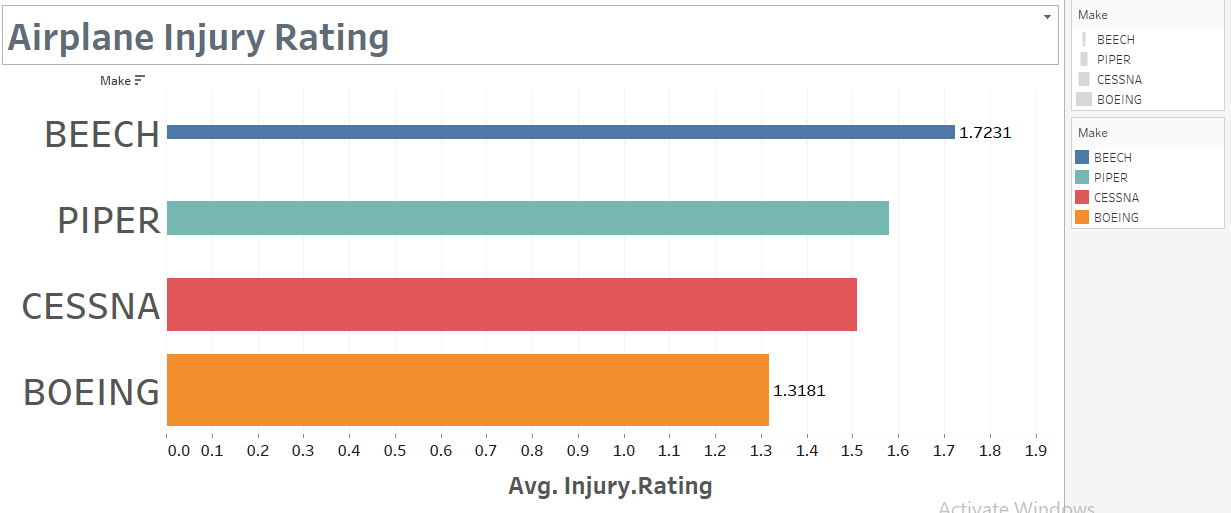

In [97]:
Image(filename='images/Airplane_Injury_Rating.PNG')

Our first business recommendation based on the available data is that Boeing has the safest airplanes, and thereby would be the best purchasing decision.

### Business Recommendation 2

In [91]:
print("Safety Scores for each Make:")
pared_down_df.groupby('Make')['injury.rating'].mean().sort_values()

Safety Scores for each Make:


Make
BOEING    1.318083
CESSNA    1.509610
PIPER     1.579661
BEECH     1.723087
Name: injury.rating, dtype: float64

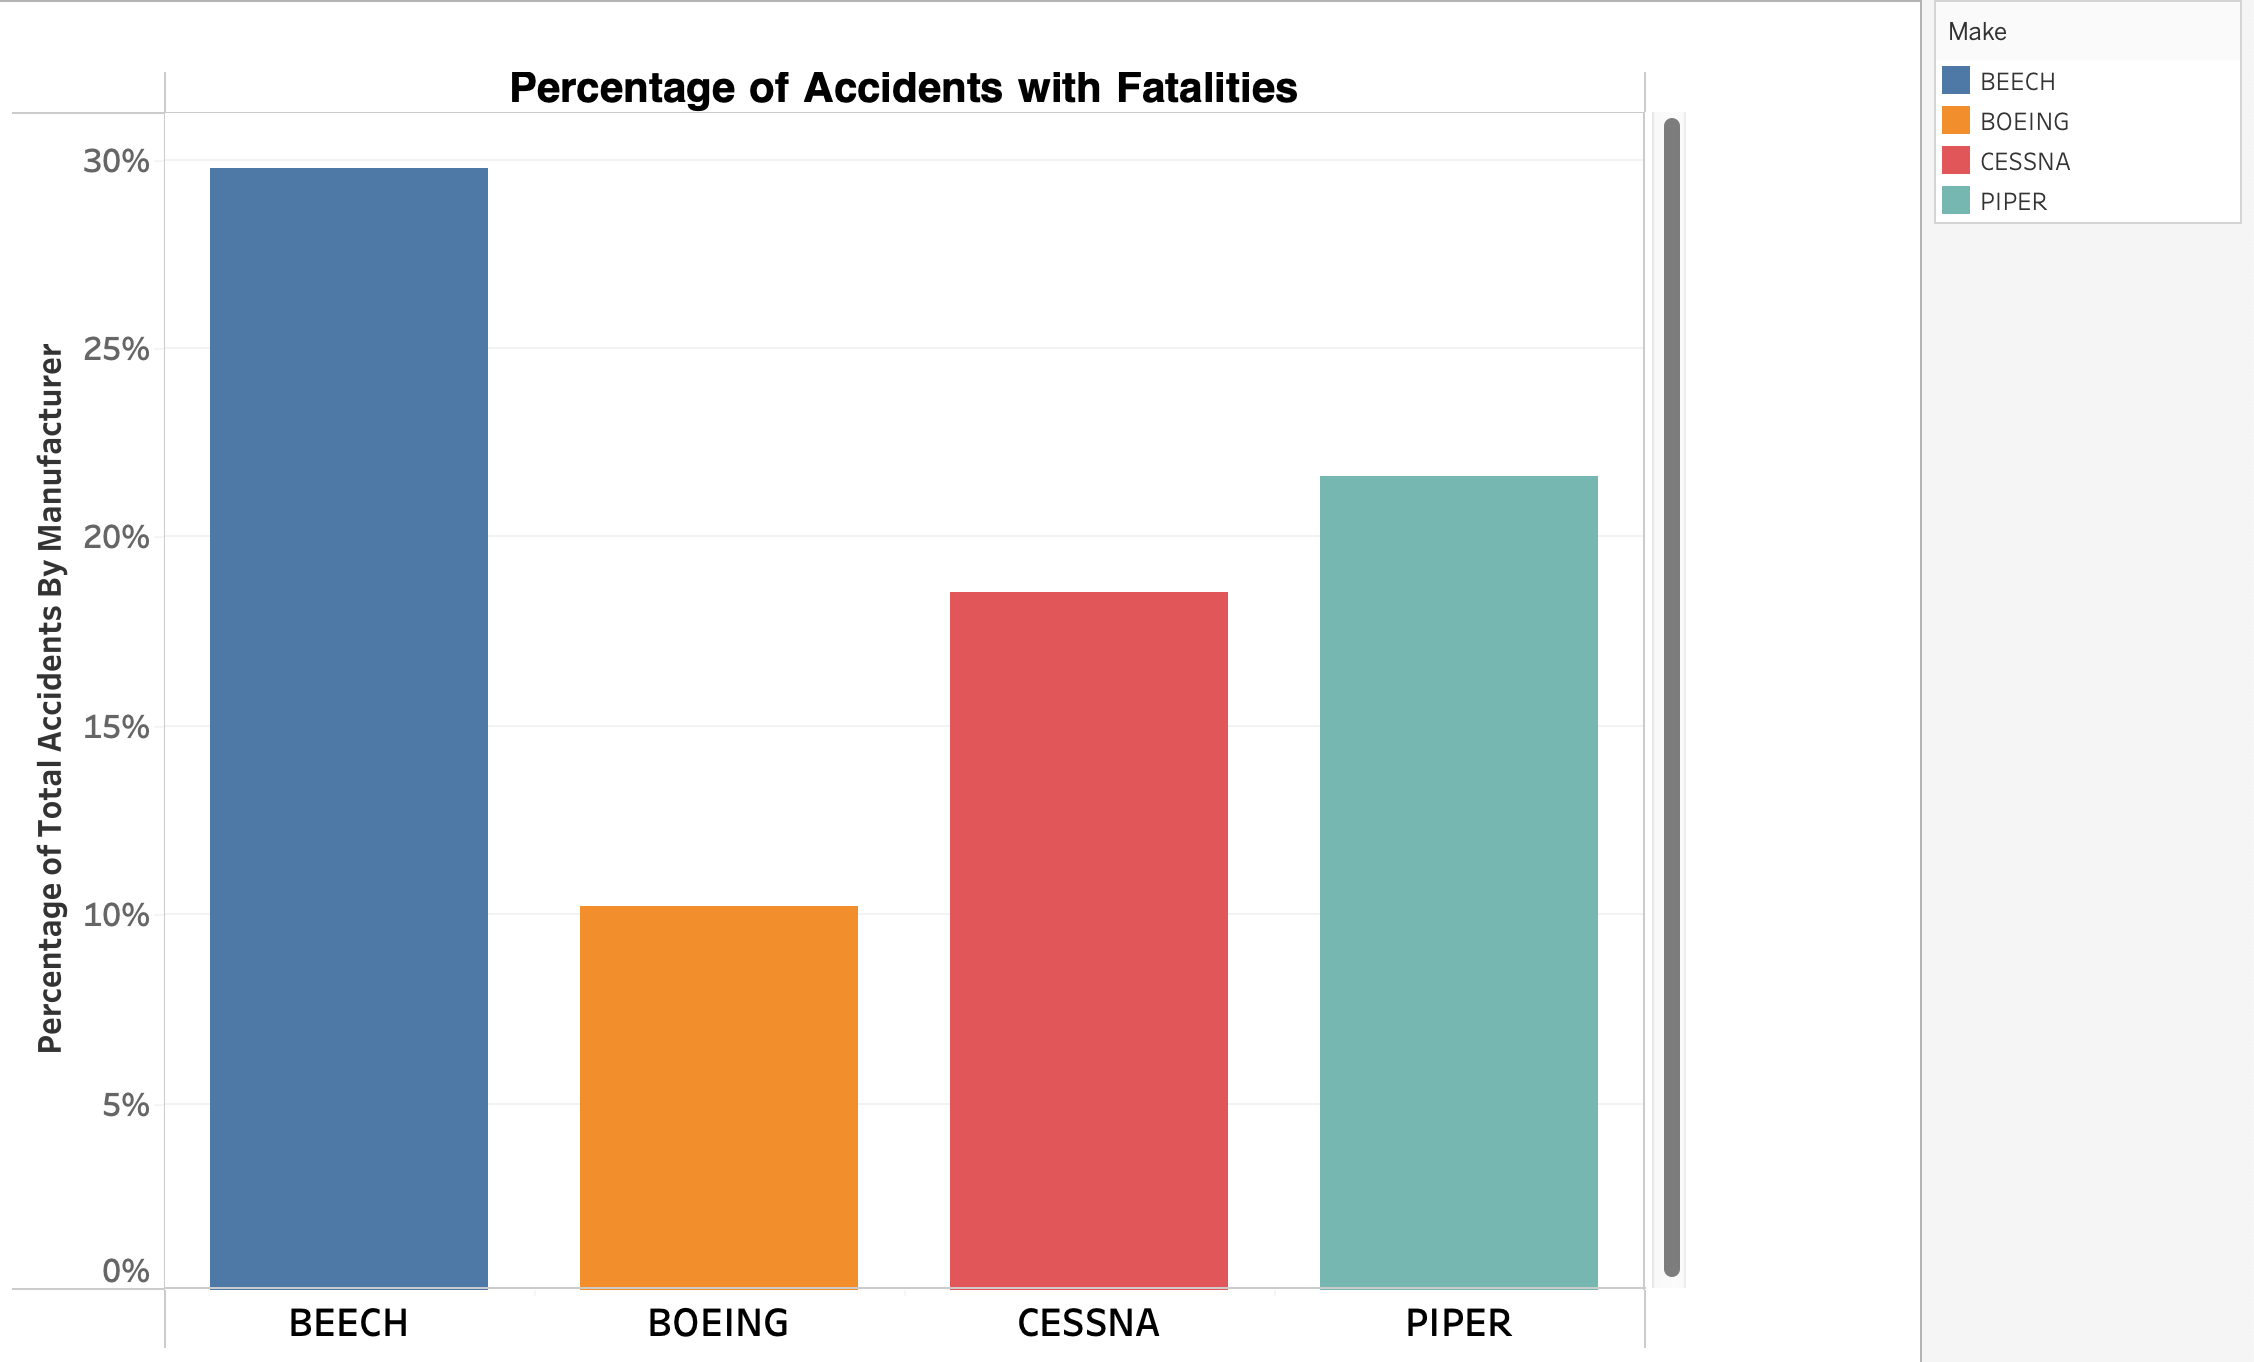

In [98]:
Image(filename='images/Airplane_Injury_Rating_Percentage.png')

In conjunction with the previous recommendation, we would also recommend avoiding Beech; they have a very low safety rating in this context and would be the worst purchasing choice.

### Business Recommendation 3

In [92]:
pared_down_US_df['State'].shape

(11879,)

In [93]:
pared_down_US_df['State'].value_counts(normalize = True)*100

State
CA    9.268457
AK    8.965401
TX    7.955215
FL    7.450122
AZ    3.830289
CO    2.929540
WA    2.870612
GA    2.828521
NY    2.247664
IL    2.222409
ID    2.188736
NC    2.104554
OR    2.079300
PA    2.070881
MI    2.045627
OH    2.037209
MO    2.003536
VA    1.708898
UT    1.666807
OK    1.658389
IN    1.633134
NM    1.616298
WI    1.574207
MT    1.540534
KS    1.540534
MN    1.490024
NV    1.397424
NJ    1.380588
LA    1.372169
AL    1.355333
TN    1.346915
SC    1.296405
AR    1.186969
IA    1.027022
MD    1.018604
MA    0.968095
MS    0.909167
KY    0.875495
NE    0.867076
WY    0.867076
ME    0.791312
SD    0.639784
ND    0.631366
CT    0.622948
HI    0.505093
WV    0.420911
NH    0.387238
VT    0.294638
RI    0.202037
DE    0.092600
DC    0.016836
Name: proportion, dtype: float64

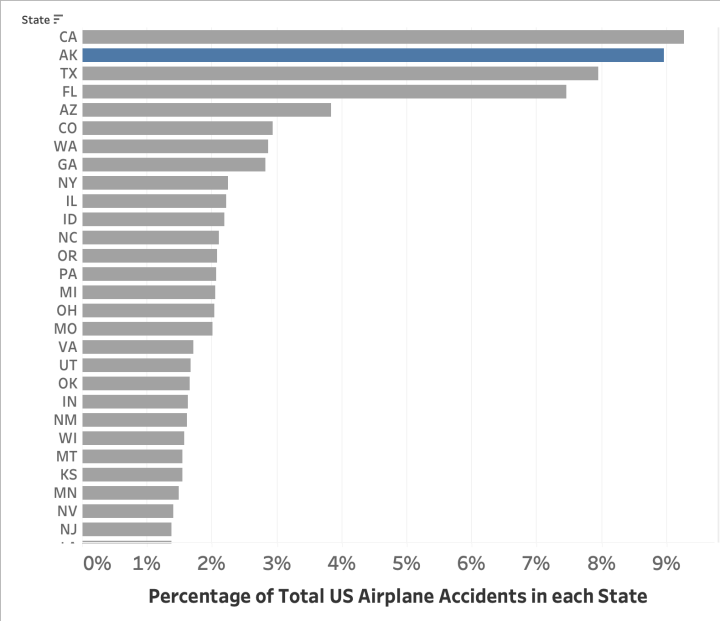

In [99]:
Image(filename='images/Airplane_Accidents_in_States.png')

In [94]:
folder_path = 'data/'
file_name = 'pared_down_US_df.csv' 


full_path = folder_path + file_name

pared_down_US_df.to_csv(full_path, index=True)

In [95]:
folder_path = 'data/'
file_name = 'pared_down_df.csv' 


full_path = folder_path + file_name

pared_down_df.to_csv(full_path, index=True)

Our last recommendation would be to avoid Alaska whenever possible; we were not told whether our avionics interest was in shipping or passengers, but the financial losses from either would be too great to bear. At the very least, we should weigh any possible venture in Alaska as regards avionics with great care.

## Conclusion

After exploring, preparing, cleaning and analyzing the given avionics data, our team feels very comfortable recommending Boeing as a favorable purchasing option. Furthermore, we are very certain that purchasing an airplane from Beech is advised under absolutely no circumstances. Finally, expanding our avionics business to Alaska would be a mistake at this time.

### Next Steps

In addition to our recommendation, the next stage entails creating a secure and convenient aviation setting through the implementation of essential safety precautions and a thorough safety management system.
